In [47]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import linear_model
import pandas as pd 
from sklearn.metrics import mean_squared_error

def readData(dataPath: str):
    world_happiness = pd.read_csv(dataPath, delimiter=',', header='infer')
    world_happiness["Happiness.Score"] = world_happiness["Happiness.Score"].fillna(world_happiness["Happiness.Score"].mode()[0])
    world_happiness["Economy..GDP.per.Capita."] = world_happiness["Economy..GDP.per.Capita."].fillna(world_happiness["Economy..GDP.per.Capita."].mode()[0])
    world_happiness["Freedom"] = world_happiness["Freedom"].fillna(world_happiness["Freedom"].mode()[0])
    
    q1= world_happiness["Happiness.Score"].quantile(0.01)
    q2= world_happiness["Happiness.Score"].quantile(0.99)

    world_happiness = world_happiness[world_happiness["Happiness.Score"].between(q1,q2)]

    q3= world_happiness["Economy..GDP.per.Capita."].quantile(0.01)
    q4= world_happiness["Economy..GDP.per.Capita."].quantile(0.99)

    world_happiness = world_happiness[world_happiness["Economy..GDP.per.Capita."].between(q3,q4)]

    q5= world_happiness["Freedom"].quantile(0.01)
    q6= world_happiness["Freedom"].quantile(0.99)

    world_happiness = world_happiness[world_happiness["Freedom"].between(q5,q6)]
    return world_happiness


def plotDataDistribution(dfWorldHappiness):
    fig, axes = plt.subplots(nrows=3, figsize=(15,15))
    axes[0].hist(dfWorldHappiness["Happiness.Score"])
    axes[0].set_title("Happiness")
    axes[1].hist(dfWorldHappiness["Economy..GDP.per.Capita."])
    axes[1].set_title("PIB")
    axes[2].hist(dfWorldHappiness["Freedom"])
    axes[2].set_title("Freedom")
    plt.show()

def plotData(dfWorldHappiness):
    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')
    axes.scatter(dfWorldHappiness["Economy..GDP.per.Capita."], dfWorldHappiness["Freedom"],dfWorldHappiness["Happiness.Score"], 'ro')
    axes.set_xlabel('GDP')
    axes.set_ylabel('Freedom')
    axes.set_zlabel('Happiness')
    axes.set_title('Relation between GDP, Freedom and Happiness')
    plt.show()

def getTrainingAndValidationSets(dfWorldHappiness):
    dataSize = dfWorldHappiness.shape[0]
    
    trainingIndexSet = np.random.choice(range(dataSize), size=int(0.8 * dataSize), replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet]

    trainingInputSet = [[dfWorldHappiness["Economy..GDP.per.Capita."].iloc[index], dfWorldHappiness["Freedom"].iloc[index]] for index in trainingIndexSet]
    trainingOutputSet = [dfWorldHappiness["Happiness.Score"].iloc[index] for index in trainingIndexSet]

    validationInputSet = [[dfWorldHappiness["Economy..GDP.per.Capita."].iloc[index], dfWorldHappiness["Freedom"].iloc[index]] for index in validationIndexSet]
    validationOutputSet = [dfWorldHappiness["Happiness.Score"].iloc[index] for index in validationIndexSet]

    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet


def plotTrainingAndValidationSets(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSets(dfWorldHappiness)
    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')
    xvalue = [pereche[0] for pereche in trainingInputSet] #gdp
    yvalue = [pereche[1] for pereche in trainingInputSet] #freedom
    zvalue = trainingOutputSet #happiness

    xvalueValidation = [pereche[0] for pereche in validationInputSet] #gdp
    yvalueValidation = [pereche[1] for pereche in validationInputSet] #freedom
    zvalueValidation = validationOutputSet #happiness

    axes.scatter(xvalue, yvalue, zvalue, 'ro')
    axes.scatter(xvalueValidation, yvalueValidation, zvalueValidation, 'g^')

    axes.set_xlabel('GDP')
    axes.set_ylabel('Freedom')
    axes.set_zlabel('Happiness')
    axes.set_title('Relation between GDP, Freedom and Happiness')
    plt.show()
    

def getRegressorFromLibrary(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(dfWorldHappiness)
    X = [el for el in trainingInputSet]
    regressor = linear_model.LinearRegression()
    regressor.fit(X, trainingOutputSet)
    return regressor

def plotRegressor(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(dfWorldHappiness)
    trainingInputSet = np.array(trainingInputSet)  # Convert to NumPy array
    regressor = getRegressorFromLibrary(dfWorldHappiness)
    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
    
    # Generate data for plotting the plane
    x_min, x_max = np.min(trainingInputSet[:,0]), np.max(trainingInputSet[:,0])
    y_min, y_max = np.min(trainingInputSet[:,1]), np.max(trainingInputSet[:,1])
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 20), np.linspace(y_min, y_max, 20))
    zz = w0 + w1 * xx + w2 * yy

    # Plot the data points
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(trainingInputSet[:,0], trainingInputSet[:,1], trainingOutputSet, c='b', marker='o', label='Training Data')
    
    # Plot the plane representing the model
    ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='viridis', label='Model Plane')
    
    ax.set_title('Training Data and Model Plane')
    ax.set_xlabel('GDP')
    ax.set_ylabel('Freedom')
    ax.set_zlabel('Happiness')
    
    plt.show()

def getErrors(dfWorldHappiness):
    _,_, validationInputSet, validationOutputSet = getTrainingAndValidationSets(dfWorldHappiness)
    regressor = getRegressorFromLibrary(dfWorldHappiness)
    computedValidationOutputs = regressor.predict(validationInputSet)
    manualError = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputSet):
        manualError += (t1 - t2)**2
    manualError = manualError / len(validationOutputSet)
    computedError = mean_squared_error(validationOutputSet, computedValidationOutputs)
    return manualError, computedError


## PROBLEMA V1 - PIB si Freedom

<h2>Distributia datelor</h2>

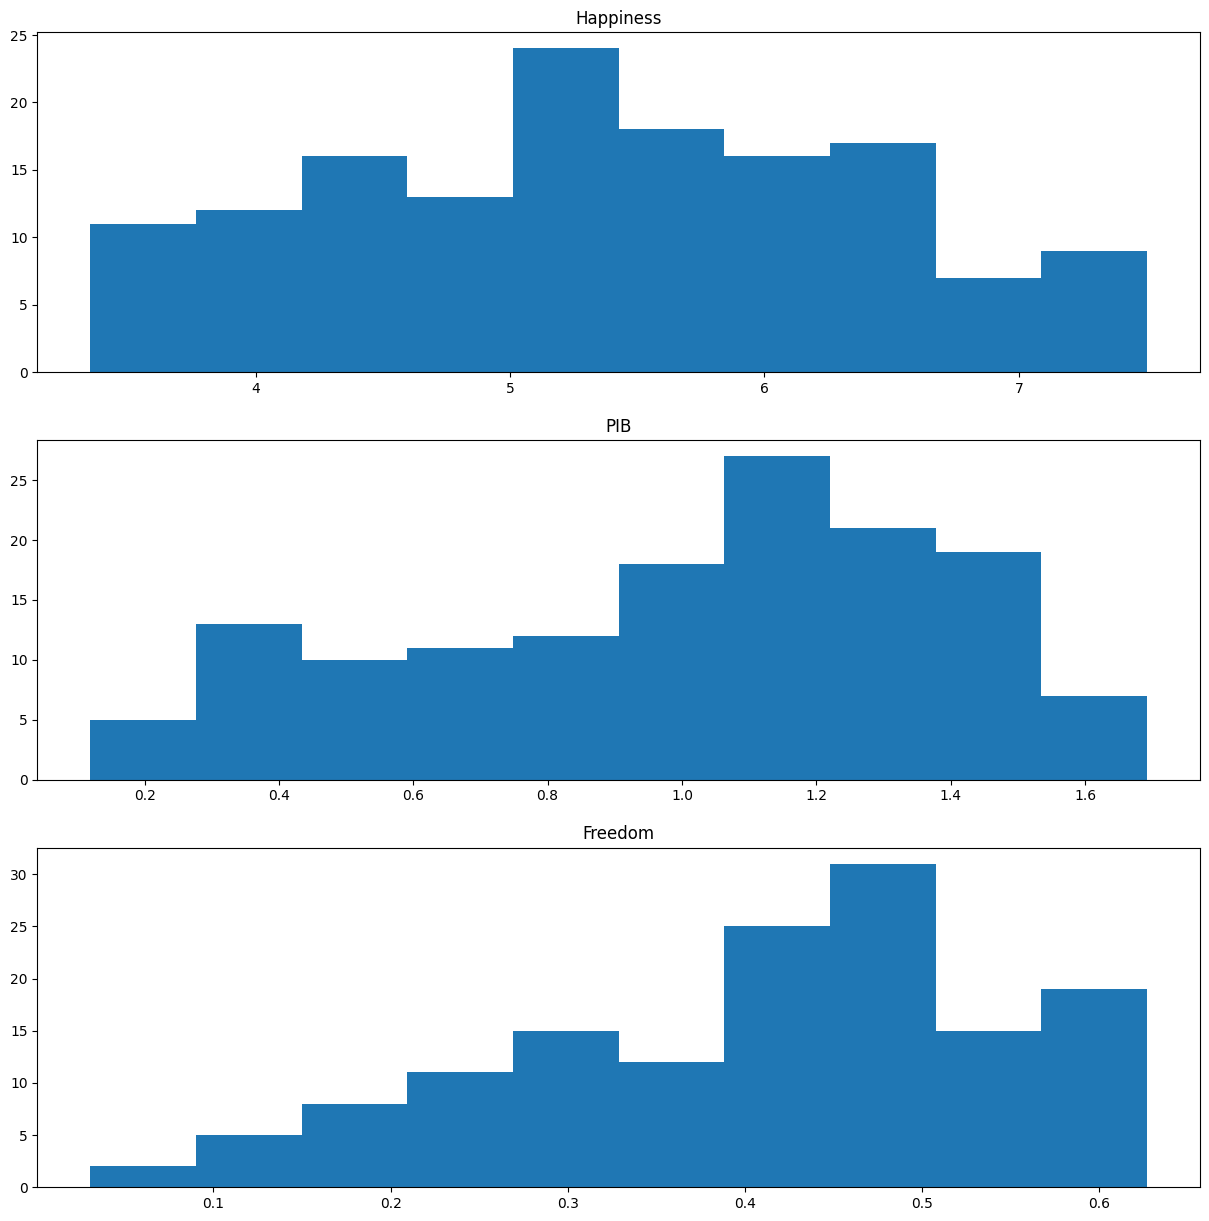

In [48]:
worldHappiness = readData("v1_world-happiness-report-2017.csv");
plotDataDistribution(worldHappiness)

<h2>Plot data</h2>

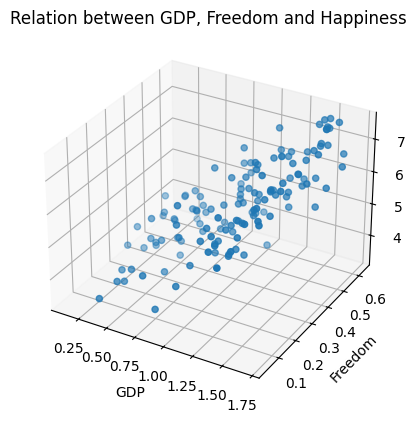

In [49]:
plotData(worldHappiness)

<h2>Impartirea datelor in date de antrenament si date de test</h2>

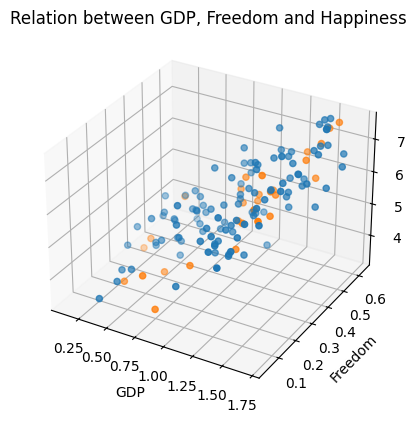

In [50]:
plotTrainingAndValidationSets(worldHappiness)

<h2>Regresor</h2>

LEARNED MODEL: f(x) =  2.5700415799073304  +  1.9712918684239875  * x1  +  2.0578024825997034  * x2
MANUAL ERROR =  0.29582082376139157
COMPUTED ERROR =  0.29582082376139157


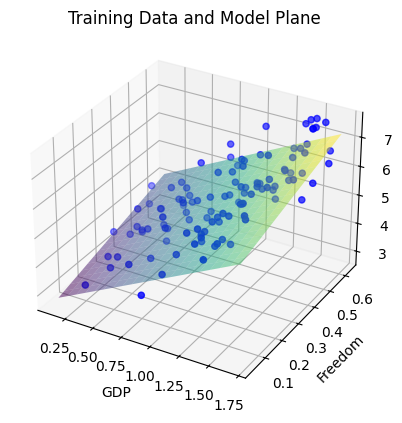

In [51]:
regressor = getRegressorFromLibrary(worldHappiness)
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print("LEARNED MODEL: f(x) = ", w0, " + ", w1, " * x1", " + ", w2, " * x2")

manualError, computedError = getErrors(worldHappiness)
print("MANUAL ERROR = ", manualError)
print("COMPUTED ERROR = ", computedError)
plotRegressor(worldHappiness)

## PROBLEMA V2 - PIB si Freedom

<h2>Distributia datelor</h2>

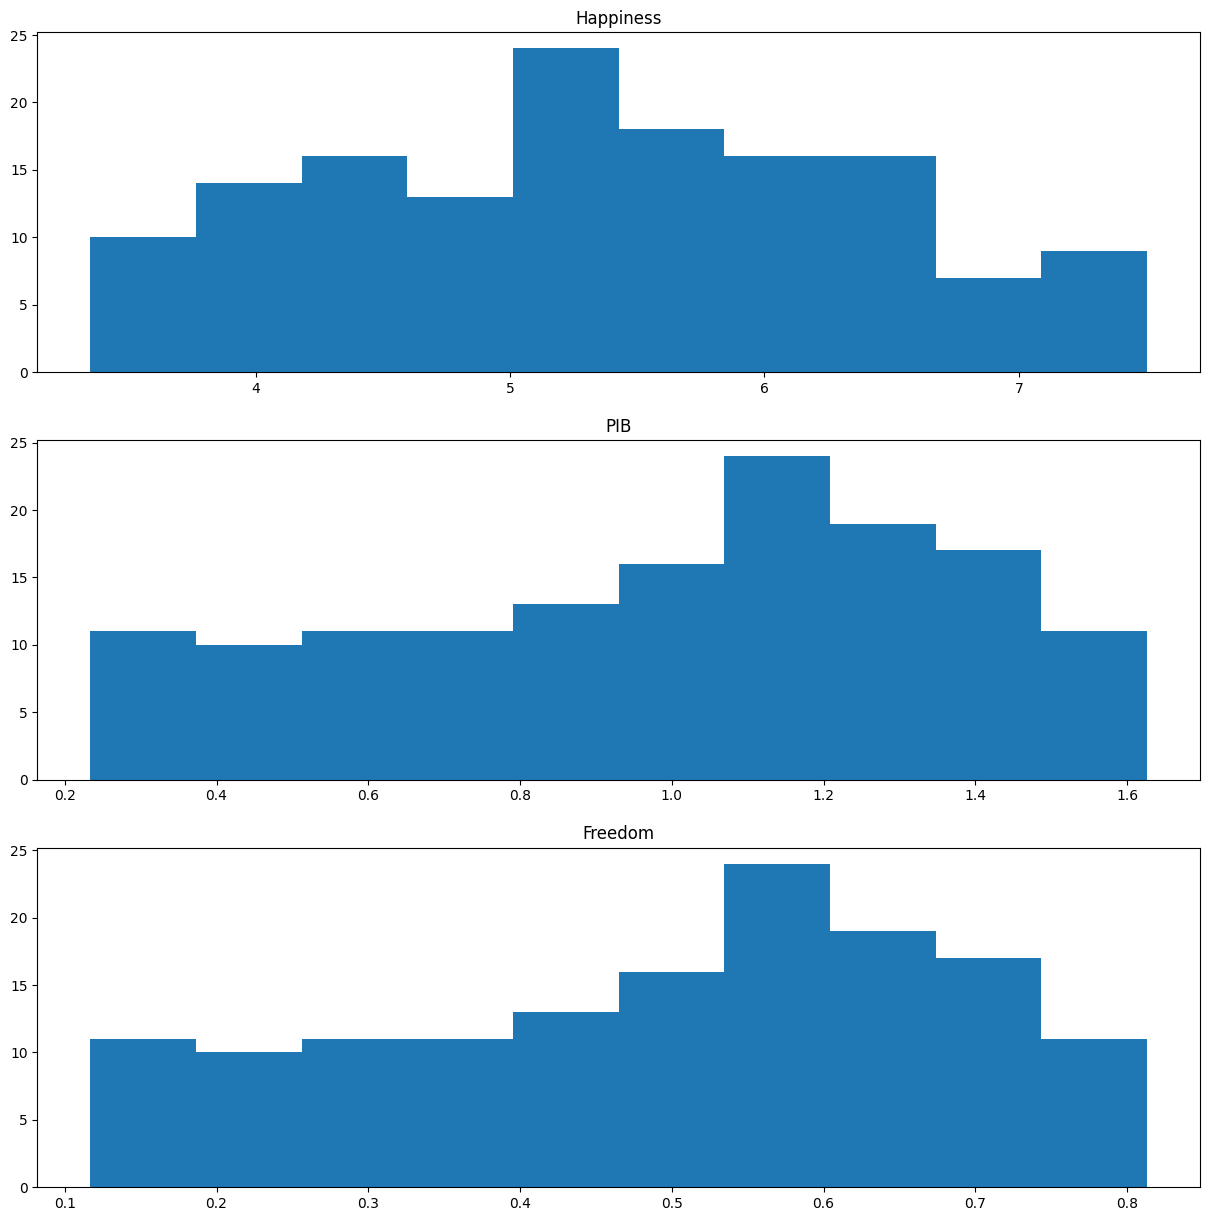

In [52]:
worldHappiness2 = readData("v2_world-happiness-report-2017.csv");
plotDataDistribution(worldHappiness2)

<h2>Plot data</h2>

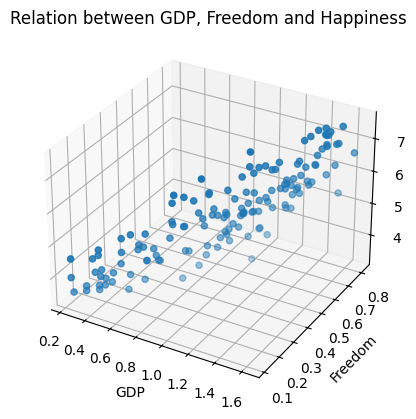

In [53]:
plotData(worldHappiness2)

<h2>Impartirea datelor in date de antrenament si date de test</h2>

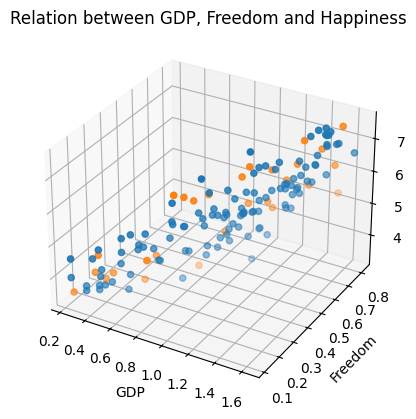

In [54]:
plotTrainingAndValidationSets(worldHappiness2)

<h2>Regresor</h2>

LEARNED MODEL: f(x) =  3.1265708690227605  +  7902788.990498791  * x1  +  -15805573.428498762  * x2
MANUAL ERROR =  0.5032904656878547
COMPUTED ERROR =  0.5032904656878548


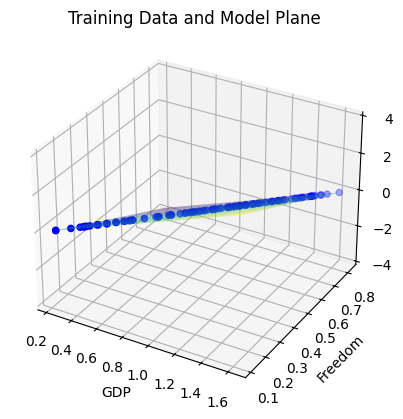

In [55]:
regressor = getRegressorFromLibrary(worldHappiness2)
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print("LEARNED MODEL: f(x) = ", w0, " + ", w1, " * x1", " + ", w2, " * x2")

manualError, computedError = getErrors(worldHappiness2)
print("MANUAL ERROR = ", manualError)
print("COMPUTED ERROR = ", computedError)
plotRegressor(worldHappiness2)

## PROBLEMA V3 - PIB si Freedom

<h2>Distributia datelor</h2>

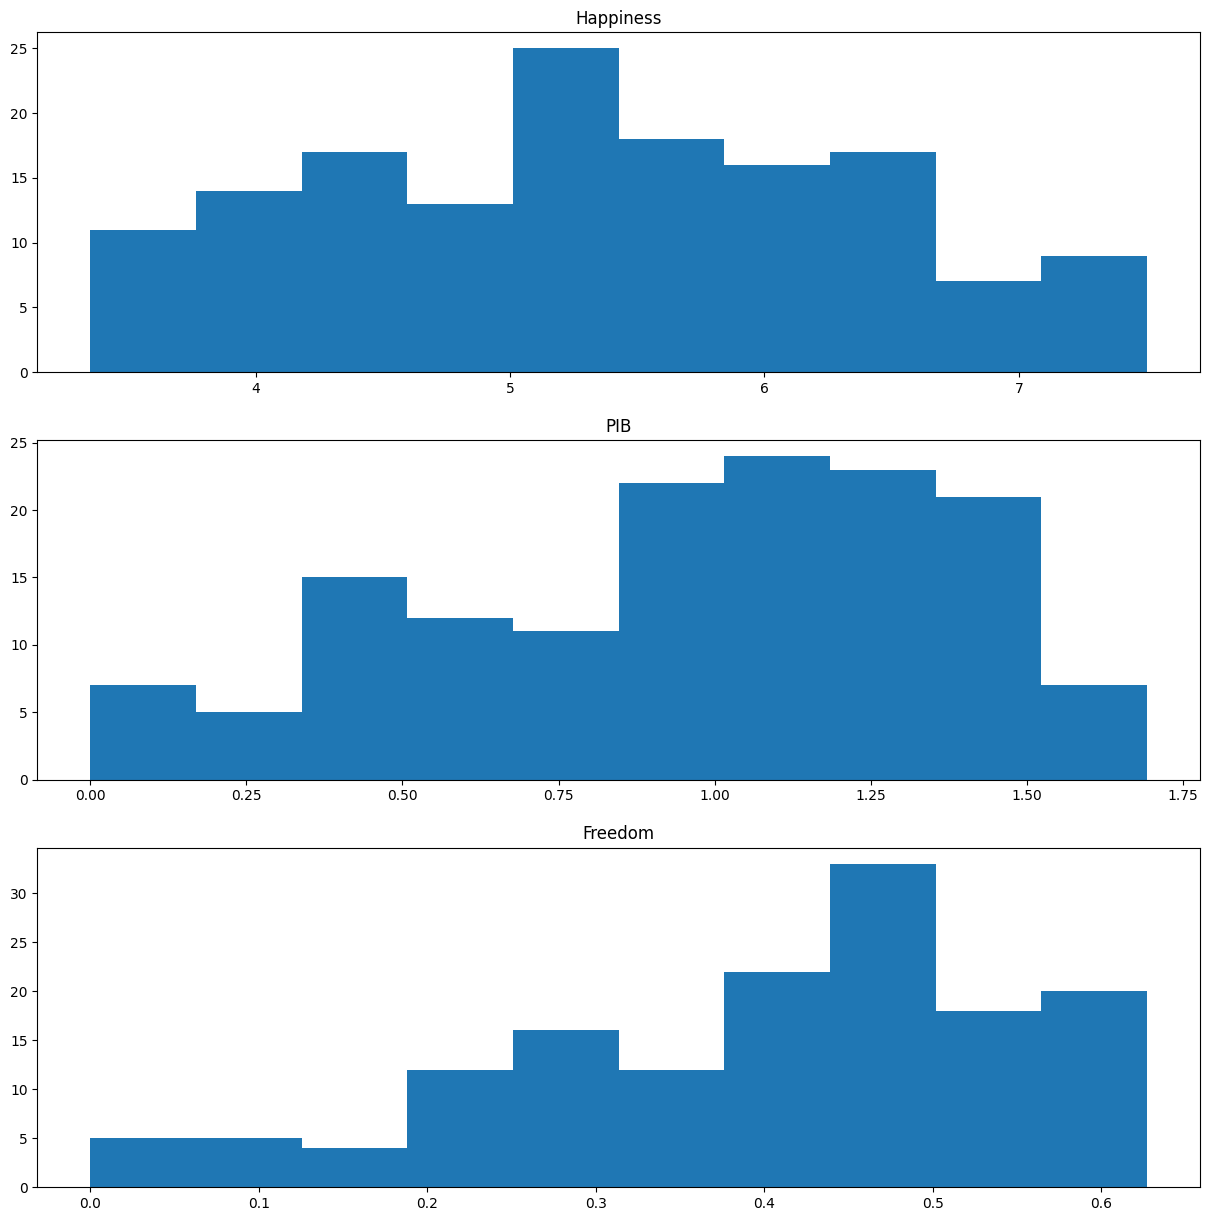

In [56]:
worldHappiness3 = readData("v3_world-happiness-report-2017.csv");
plotDataDistribution(worldHappiness3)

<h2>Plot data</h2>

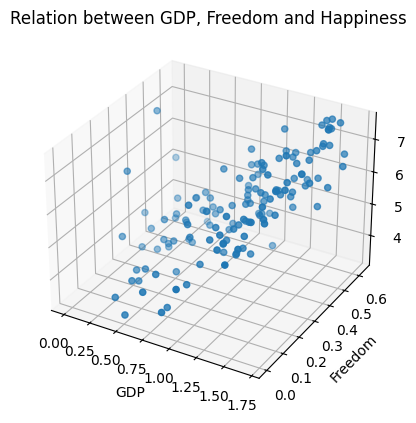

In [57]:
plotData(worldHappiness3)

<h2>Impartirea datelor in date de antrenament si date de test</h2>

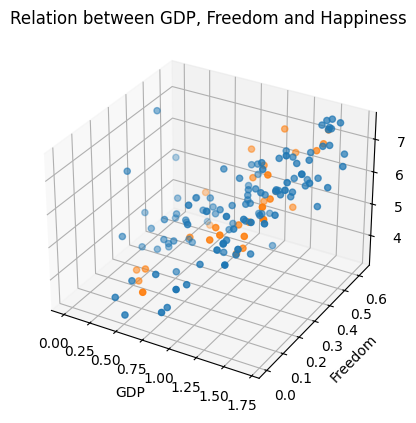

In [58]:
plotTrainingAndValidationSets(worldHappiness3)

<h2>Regresor</h2>

LEARNED MODEL: f(x) =  2.873781843605886  +  1.471566424472205  * x1  +  2.613995205309283  * x2
MANUAL ERROR =  0.6496975713946471
COMPUTED ERROR =  0.6496975713946471


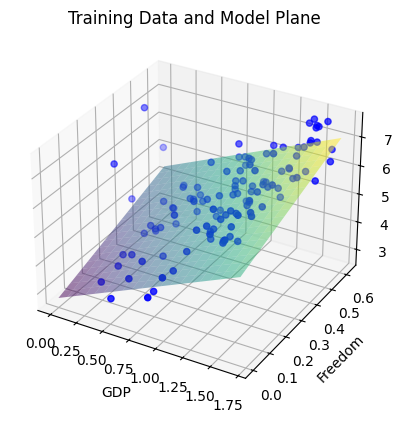

In [59]:
regressor = getRegressorFromLibrary(worldHappiness3)
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print("LEARNED MODEL: f(x) = ", w0, " + ", w1, " * x1", " + ", w2, " * x2")

manualError, computedError = getErrors(worldHappiness3)
print("MANUAL ERROR = ", manualError)
print("COMPUTED ERROR = ", computedError)
plotRegressor(worldHappiness3)